# Exploratory Data Analysis
Make an exploratory data analysis of the provided dataset: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. You should document your analysis with proper visualizations.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist

In [2]:
de_train = pd.read_csv("./train_dev_test_splits/de.train.csv", sep="\t")
de_val = pd.read_csv("./train_dev_test_splits/de.valid.csv", sep="\t")
de_test = pd.read_csv("./train_dev_test_splits/de.test.csv", sep="\t")

fr_train = pd.read_csv("./train_dev_test_splits/fr.train.csv", sep="\t")
fr_val = pd.read_csv("./train_dev_test_splits/fr.valid.csv", sep="\t")
fr_test = pd.read_csv("./train_dev_test_splits/fr.test.csv", sep="\t")

fr_raw =  pd.read_csv("./annotations/fr.data.csv", sep=";")
de_raw =  pd.read_csv("./annotations/de.data.csv", sep=";")

Each dataset (train, validation and test) has 12 columns correspondent to the content of the text and each subtask analyzed. In the scope of our project, we're only going to focus on the e1 subtask that focuses on determining wether the comment has a positive/negative evaluation.

In [3]:
de_train.columns # all other datasets have the same number of columns

Index(['id', 'content', 'e1', 'e2', 'e3a', 'e3b', 'e3c', 'a1', 'a2', 'a3a',
       'a3b', 'a3c'],
      dtype='object')

In [4]:
fr_raw.columns

Index(['id', 'content', 'user_id', 'date', 'article_id', 'direct_parent_id',
       'internal_id', 'outlet', 'outlet2', 'type', 'type2', 'length', 'words',
       'no_thread', 'no_replies'],
      dtype='object')

In order to get the most amount of information and to have a complete dataset, we concatenate all the 3 separate datasets (train, validation and test) and drop the collumns that refer to other subtasks before performing any analysis, as well as joining more information from the raw annotations dataset.

In [5]:
fr_split = pd.concat([fr_train, fr_test, fr_val])
fr_e1 = fr_split.drop(columns=['e2', 'e3a', 'e3b', 'e3c', 'a2', 'a3a', 'a3b', 'a3c'])
fr = pd.merge(fr_e1, fr_raw, on=['id'], how='left').drop(columns = ['content_y']).rename(columns={'content_x' : 'content'})

de_split = pd.concat([de_train, de_test, de_val])
de_e1 = de_split.drop(columns=['e2', 'e3a', 'e3b', 'e3c', 'a2', 'a3a', 'a3b', 'a3c'])
de = pd.merge(de_e1, de_raw, on=['id'], how='left').drop(columns = ['content_y']).rename(columns={'content_x' : 'content'})

In [6]:
fr.shape, de.shape

((3678, 17), (4306, 17))

In [7]:
display('French Dataset', fr.head())
display('German Dataset', de.head())

'French Dataset'

,id,content,e1,a1,user_id,date,article_id,direct_parent_id,internal_id,outlet,outlet2,type,type2,length,words,no_thread,no_replies
0,2610,"C’est bizarre, on bouffe de l’Europe à en avoi...",0,1,user_677,NaN,r1_article_2479,r1_comment_7826,r1_comment_7827,ripostelaique,12,reply,3,517,85,23,1.0
1,3969,Et la mer profonde...,2,0,user_72,2020-05-25 12:31:25,r13_article_8,r13_comment_187,r13_comment_188,francetvinfo,8,reply,3,21,3,1,3.0
2,3903,il faut toujours plus de consommateurs pour fa...,0,0,user_9,2020-01-17 12:29:55,r13_article_4,r13_comment_87,r13_comment_89,francetvinfo,8,reply,3,177,27,4,3.0
3,555,Vous répétez tous à l'envi le même refrain mai...,0,1,valeurs_actuelles_user_682,2020-04-22 18:32:00,r1_valeurs_actuelles_article_928,r1_valeurs_actuelles_comment_11856,r1_valeurs_actuelles_comment_11857,valeursactuelles,11,reply,3,217,36,40,1.0
4,3510,"On comprend « l’erreur » des fonctionnaires, s...",0,1,user_47,2020-01-02 10:34:00,r11_article_4,r11_article_4,r11_comment_56,lemonde,9,comment,2,425,67,7,NaN


'German Dataset'

,id,content,e1,a1,user_id,date,article_id,direct_parent_id,internal_id,outlet,outlet2,type,type2,length,words,no_thread,no_replies
0,3638,und schreiben ihren ... Deutschland wird islam...,2,0,user_52,NaN,r11_article_2,r11_comment_75,r11_comment_79,zeit,2,reply,3,294,40,14.0,4.0
1,2637,"Nur, werter @ Dirk, den Loriot-Hund gab es sch...",0,0,user_55,2020-04-28 18:26:00,r1_article_11,r1_comment_195,r1_comment_196,jungefreiheit,6,reply,3,210,32,2.0,1.0
2,634,Der Ruf (Adhan) zum Kontaktgebet Es gibt keine...,2,0,5eac65ff18f72b0001aec928,2020-05-01 20:10:07,r1_article_4531,r1_article_4531,r1_comment_21115,welt,3,comment,2,1158,175,10.0,NaN
3,941,"Merz hat recht, denn selbst muslimische Islam-...",1,1,5c7f92d146e0fb00019e7923,2020-01-29 08:46:44,r1_article_6580,r1_article_6580,r1_comment_32924,welt,3,comment,2,350,51,4.0,NaN
4,1793,"Da sieht man wieder, es wird , egal wie schlec...",0,0,user_342,2020-01-03 22:15:00,r11_article_3,r11_article_3,r11_comment_446,focus,4,comment,2,566,87,5.0,NaN


#### Articles, Comments and Replies

In [8]:
colors = sb.color_palette('pastel')[0:5]

def pie(df, title, col):

    type_counts = df[col].value_counts().rename_axis(col).reset_index(name='counts')
    data = type_counts['counts'].values

    plt.pie(data, colors = colors, autopct='%1.1f%%')
    plt.title(title)

    legend_labels = ['{} ({})'.format(c, v) for c, v in zip(type_counts[col], type_counts['counts'])]
    plt.legend(legend_labels, loc='best')

    plt.show()

def barplot(df, title, col):
    axis = sb.countplot(x=col, data=df, palette=colors)

    for p in axis.patches:
        axis.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))

    plt.xlabel(col)
    plt.ylabel('Total Number')
    plt.title(title)

    plt.show()

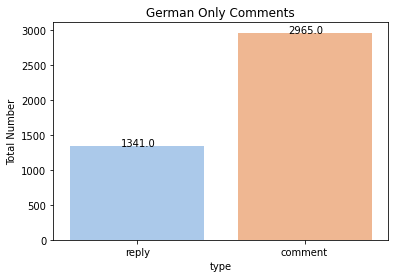

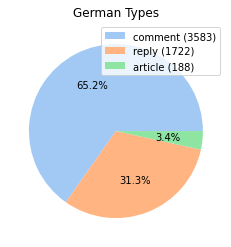

(None, None)

In [9]:
barplot(de, 'German Only Comments', 'type'), pie(de_raw, 'German Types', 'type')

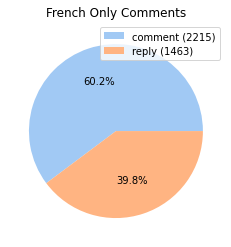

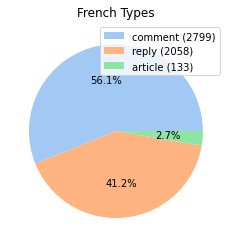

(None, None)

In [10]:
pie(fr, 'French Only Comments', 'type'), pie(fr_raw, 'French Types', 'type')

Average Comment Length

In [11]:
def avg_length(df):
    return sum(tk for tk in df["length"]) / df.size

print(f"Average comment length - German: {avg_length(de):.2f}")
print(f"Average comment length - French: {avg_length(fr):.2f}")

Average comment length - German: 23.19
Average comment length - French: 13.84


Average Comment Words

In [12]:
def avg_words(df):
    return sum(tk for tk in df["words"]) / df.size

print(f"Average no. words in comment - German: {avg_words(de):.2f}")
print(f"Average no. words in comment - French: {avg_words(fr):.2f}")

Average no. words in comment - German: 3.40
Average no. words in comment - French: 2.27


Average words per Evaluation and Action

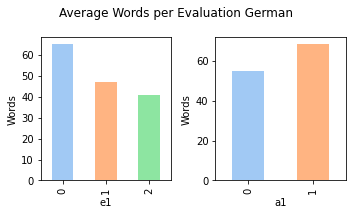

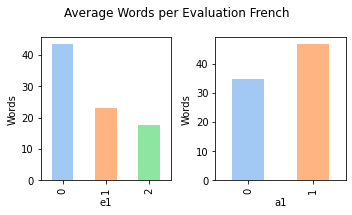

(None, None)

In [13]:
def word_avg(df, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    df.groupby('e1')['words'].mean().plot(kind='bar', color=colors, ax=axes[0])
    df.groupby('a1')['words'].mean().plot(kind='bar', color=colors, ax=axes[1])
    plt.suptitle(title)
    axes[0].set_ylabel('Words')
    axes[1].set_ylabel('Words')

    fig.tight_layout()

    plt.show()

word_avg(de, 'Average Words per Evaluation German'), word_avg(fr, 'Average Words per Evaluation French')

#### Evaluation Distribution

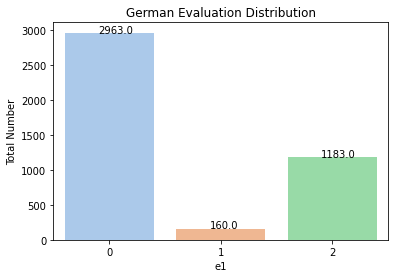

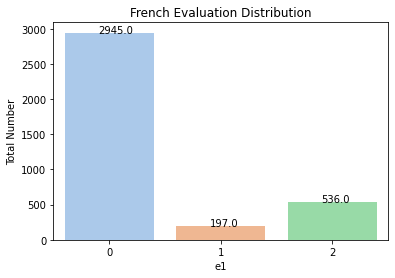

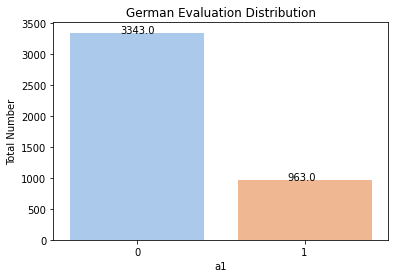

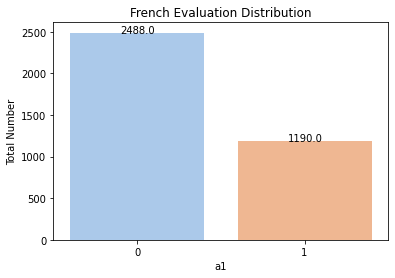

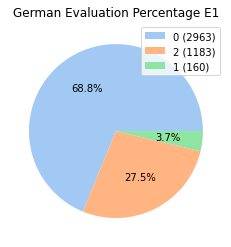

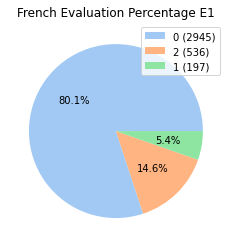

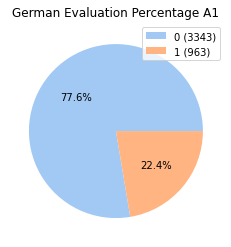

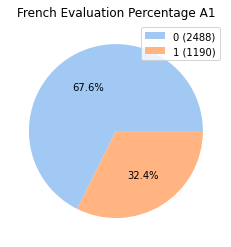

(None, None)

In [14]:
barplot(de, 'German Evaluation Distribution', 'e1'), barplot(fr, 'French Evaluation Distribution', 'e1') 
barplot(de, 'German Evaluation Distribution', 'a1'), barplot(fr, 'French Evaluation Distribution', 'a1')
pie(de, 'German Evaluation Percentage E1', 'e1'), pie(fr, 'French Evaluation Percentage E1', 'e1')
pie(de, 'German Evaluation Percentage A1', 'a1'), pie(fr, 'French Evaluation Percentage A1', 'a1')

#### Comments by News Outlet

In [15]:
de['outlet'].value_counts().rename_axis('outlet').reset_index(name='comments').sort_values('comments', ascending=False)

,outlet,comments
0,tagesschau,960
1,focus,892
2,zeit,844
3,jungefreiheit,658
4,welt,635
5,compact,245
6,epochtimes,72


In [16]:
fr['outlet'].value_counts().rename_axis('outlet').reset_index(name='comments').sort_values('comments', ascending=False)

,outlet,comments
0,figaro,1007
1,ripostelaique,959
2,valeursactuelles,575
3,francetvinfo,555
4,lemonde,505
5,agoravox,77


#### Text Analysis

Wordclouds

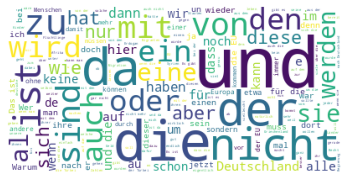

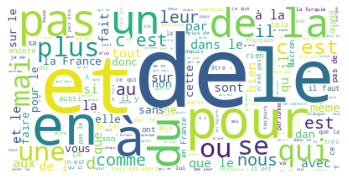

(None, None)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(tokens):
    wcloud = WordCloud(background_color='white').generate(" ".join(tokens))
    plt.figure()
    plt.imshow(wcloud)
    plt.axis('off')
    plt.show()

wordcloud(de['content']), wordcloud(fr['content'])

In [18]:
import regex
import emoji
from nltk.corpus import stopwords

def processor(data, lang, nlp):
    reg = '[^a-zA-Z0-9 àâäèéêëîïôœùûüÿçÀÂÄÈÉÊËÎÏÔŒÙÛÜŸÇ]' if lang == 'fr' else '[^a-zA-Z0-9 äöüßÄÖÜẞ]'
    sw = set(stopwords.words('french' if lang=='fr' else 'german'))
    corpus = []
    for i in range(0, data['content'].size):
        text = regex.sub(r'<U\+([0-9a-fA-F]+)>', lambda m: chr(int(m.group(1),16)), data['content'][i])
        text = emoji.demojize(text, language=lang)
        # get review and remove non alpha chars
        text = regex.sub(reg, '', text)
        text = text.lower()
        # split into tokens, apply stemming and remove stop words
        text = [t.lemma_ for t in nlp(text) if t.text not in sw and t.text != ' ']
        corpus += text

    return corpus

def processor_original(data, lang, nlp):
    reg = '[^a-zA-Z0-9 àâäèéêëîïôœùûüÿçÀÂÄÈÉÊËÎÏÔŒÙÛÜŸÇ]' if lang == 'fr' else '[^a-zA-Z0-9 äöüßÄÖÜẞ]'
    sw = set(stopwords.words('french' if lang=='fr' else 'german'))
    corpus = []
    for i in range(0, data['content'].size):
        text = regex.sub(r'<U\+([0-9a-fA-F]+)>', lambda m: chr(int(m.group(1),16)), data['content'][i])
        text = emoji.demojize(text, language=lang)
        # get review and remove non alpha chars
        text = regex.sub(reg, '', text)
        text = text.lower()
        # split into tokens, apply stemming and remove stop words
        text = ' '.join([t.lemma_ for t in nlp(text) if t.text not in sw and t.text != ' '])
        corpus.append(text)

    return corpus

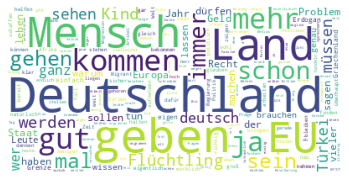

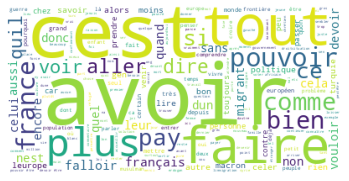

(None, None)

In [19]:
import spacy

nlp_de = spacy.load("de_core_news_sm")
nlp_fr = spacy.load("fr_core_news_sm")

de_proc = processor(de, 'de', nlp_de)
fr_proc = processor(fr, 'fr', nlp_fr)

wordcloud(de_proc), wordcloud(fr_proc)

Word Frequency

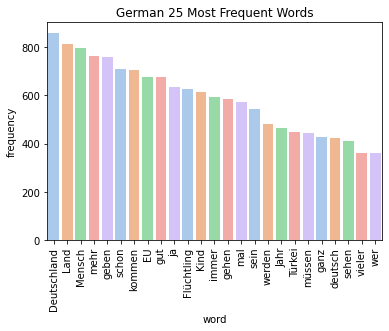

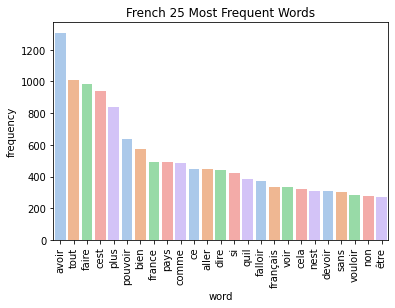

(None, None)

In [20]:
def most_freq(df, title):
    df_common = FreqDist(df).most_common(25)

    df_common = pd.DataFrame(df_common, columns=['word', 'frequency'])

    sb.barplot(data=df_common, x='word', y='frequency', palette=colors)

    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

most_freq(de_proc, 'German 25 Most Frequent Words'), most_freq(fr_proc, 'French 25 Most Frequent Words')

Word Frequency Per Evaluation - 0

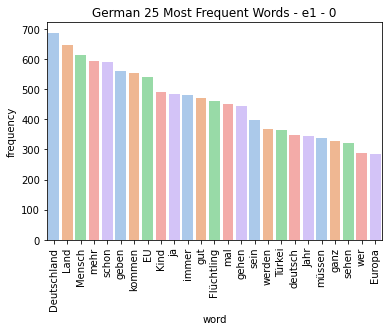

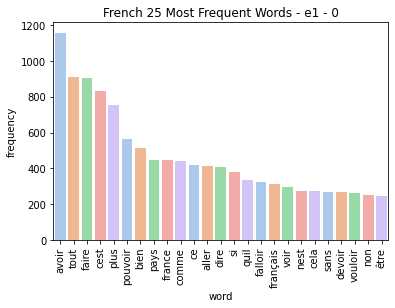

(None, None)

In [21]:
de_0 = de.loc[de['e1'] == 0].reset_index(drop=True)
de_proc_0 =  processor(de_0, 'de', nlp_de)

fr_0 = fr[fr['e1'] == 0].reset_index(drop=True)
fr_proc_0 =  processor(fr_0, 'fr', nlp_fr)

most_freq(de_proc_0, 'German 25 Most Frequent Words - e1 - 0'), most_freq(fr_proc_0, 'French 25 Most Frequent Words - e1 - 0')

Word Frequency Per Evaluation - 1

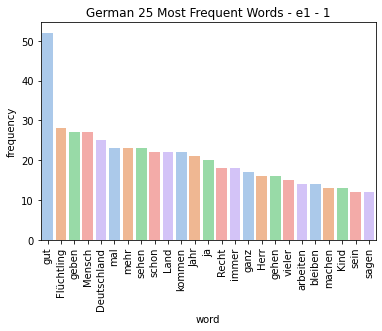

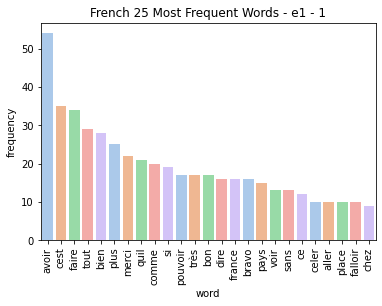

(None, None)

In [22]:
de_1 = de.loc[de['e1'] == 1].reset_index(drop=True)
de_proc_1 =  processor(de_1, 'de', nlp_de)

fr_1 = fr[fr['e1'] == 1].reset_index(drop=True)
fr_proc_1 =  processor(fr_1, 'fr', nlp_fr)

most_freq(de_proc_1, 'German 25 Most Frequent Words - e1 - 1'), most_freq(fr_proc_1, 'French 25 Most Frequent Words - e1 - 1')

Word Frequency Per Evaluation - 2

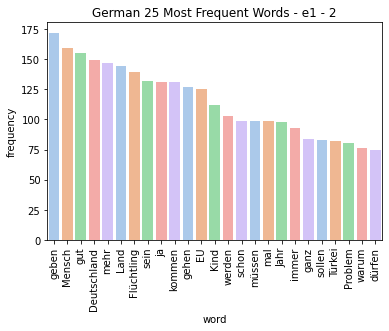

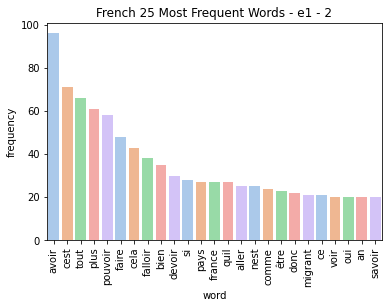

(None, None)

In [23]:
de_2 = de.loc[de['e1'] == 2].reset_index(drop=True)
de_proc_2 =  processor(de_2, 'de', nlp_de)

fr_2 = fr[fr['e1'] == 2].reset_index(drop=True)
fr_proc_2 =  processor(fr_2, 'fr', nlp_fr)

most_freq(de_proc_2, 'German 25 Most Frequent Words - e1 - 2'), most_freq(fr_proc_2, 'French 25 Most Frequent Words - e1 - 2')

Word Frequency Per Action Recommendation - 0

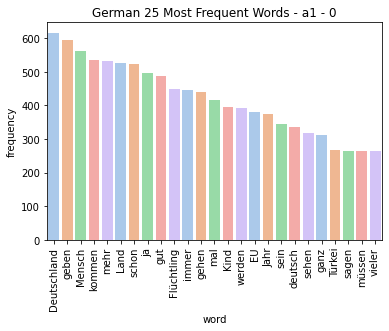

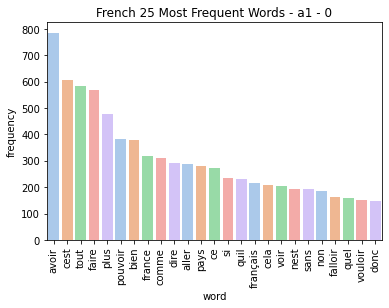

(None, None)

In [24]:
de_0 = de.loc[de['a1'] == 0].reset_index(drop=True)
de_proc_0 =  processor(de_0, 'de', nlp_de)

fr_0 = fr[fr['a1'] == 0].reset_index(drop=True)
fr_proc_0 =  processor(fr_0, 'fr', nlp_fr)

most_freq(de_proc_0, 'German 25 Most Frequent Words - a1 - 0'), most_freq(fr_proc_0, 'French 25 Most Frequent Words - a1 - 0')

Word Frequency Per Action Recommendation - 1

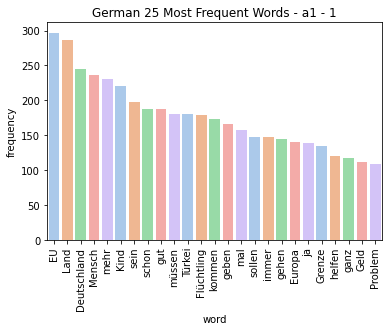

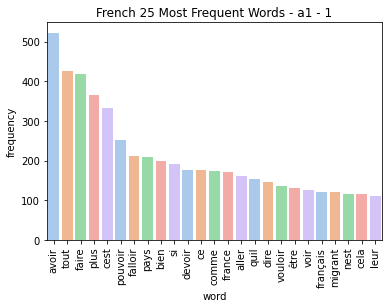

(None, None)

In [25]:
de_1 = de.loc[de['a1'] == 1].reset_index(drop=True)
de_proc_1 =  processor(de_1, 'de', nlp_de)

fr_1 = fr[fr['a1'] == 1].reset_index(drop=True)
fr_proc_1 =  processor(fr_1, 'fr', nlp_fr)

most_freq(de_proc_1, 'German 25 Most Frequent Words - a1 - 1'), most_freq(fr_proc_1, 'French 25 Most Frequent Words - a1 - 1')

### TF-IDF

In [26]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

de_corpus = processor_original(de, 'de', nlp_de)
fr_corpus = processor_original(fr, 'fr', nlp_fr)

In [27]:
vectorizer = TfidfVectorizer()

def tfidf(df):
    tfidf = vectorizer.fit_transform(df)
    tfidf_feature_names = vectorizer.get_feature_names_out()
    return tfidf, tfidf_feature_names

vectorizer_de, features_de = tfidf(de_corpus)
vectorizer_fr, features_fr = tfidf(fr_corpus)

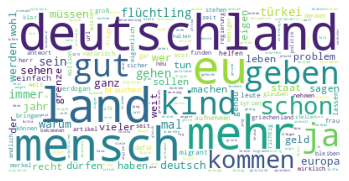

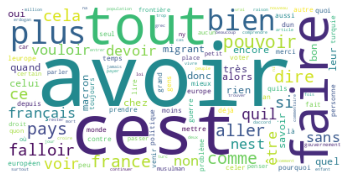

(None, None)

In [28]:
def freqs_tfidf(df, features, vec):
    sum = None
    for arr in vec.toarray():
        if sum is None:
            sum= dict(zip(features, arr))
        else:
            sum = {k: sum.get(k, 0) + v for k, v in dict(zip(features, arr)).items()}

    for k, v in sum.items():
        sum[k] = v / len(df)

    return sum

def tfidf_wordcloud(df):
    wordcloud  = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(frequencies=df)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

tfidf_wordcloud(freqs_tfidf(de_corpus, features_de, vectorizer_de)), tfidf_wordcloud(freqs_tfidf(fr_corpus, features_fr, vectorizer_fr))

### Sentiment-Analysis

In [29]:
from textblob import TextBlob
from textblob_de import TextBlobDE
from textblob_fr import PatternTagger, PatternAnalyzer

de_sent = processor_original(de, 'de', nlp_de)
fr_sent = processor_original(fr, 'fr', nlp_fr)


In [30]:
de_sent = pd.DataFrame(de_sent, columns=['lemma_str'])
de_sent['sentiment'] = de_sent['lemma_str'].apply(lambda x: TextBlobDE(x).sentiment.polarity)
display(de_sent.head())

fr_sent = pd.DataFrame(fr_sent, columns=['lemma_str'])
fr_sent['sentiment'] = fr_sent['lemma_str'].apply(lambda x: TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0])
display(fr_sent.head())

,lemma_str,sentiment
0,schreiben Deutschland islamisch verstehen daru...,0.700000
1,Werter dirk Loriothund geben schon Haldenwang ...,-1.000000
2,Ruf Adhan Kontaktgebet geben vorgeschrieben Ru...,0.185714
3,Merz Recht muslimisch islamwissenschaftl bestä...,0.820000
4,sehen egal schlecht schön reden täglich hunder...,0.950000


,lemma_str,sentiment
0,cest bizarre bouffe leurope avoir nausée quand...,-0.1000
1,mer profonde,0.2600
2,falloir toujours plus consommateur faire tourn...,0.1250
3,répéter tout lenvi refrain savoir bien quils j...,0.0540
4,comprendre lerreur fonctionnaire sil majeur me...,0.2318


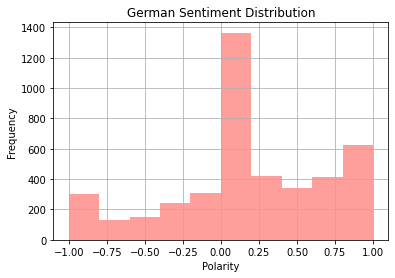

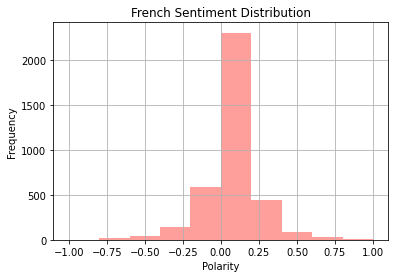

In [31]:
de_sent['sentiment'].hist(color=colors[3])
plt.title('German Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Polarity')
plt.show()

fr_sent['sentiment'].hist(color=colors[3])
plt.title('French Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Polarity')
plt.show()

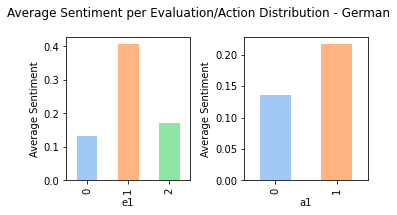

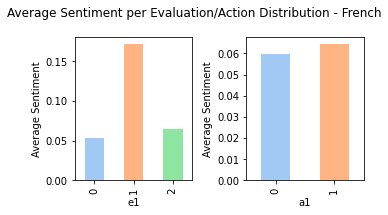

(None, None)

In [32]:
de_sent_ = pd.concat([de_sent,de],axis=1)
fr_sent_ = pd.concat([fr_sent, fr], axis=1)

def average_sentiment(df, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    df.groupby('e1')['sentiment'].mean().plot(kind='bar', color=colors, ax=axes[0])
    df.groupby('a1')['sentiment'].mean().plot(kind='bar', color=colors, ax=axes[1])
    plt.suptitle(title)
    axes[0].set_ylabel('Average Sentiment')
    axes[1].set_ylabel('Average Sentiment')

    fig.tight_layout()

    plt.show()

average_sentiment(de_sent_, 'Average Sentiment per Evaluation/Action Distribution - German'), average_sentiment(fr_sent_, 'Average Sentiment per Evaluation/Action Distribution - French')